# Does Healthy Diet Help Prevent COVID-19?  

Group Name: Fight on Healthy diet  
Name: Sijing Liu  
Email: sijingli@usc.edu  
Batch code: LISUM13: 30  
Country: U.S.  
College: University of Southern California  
Specialization: Data Science  

# Main objective   
To answer the following questions: 
- Are countries with healthier eating habits less impacted by COVID-19?  
- Does a healthy diet ultimately help prevent COVID-19?   

GitHub Repo link: https://github.com/Sijing98/Internship22Fall/tree/main/Project%20-%20Fight%20on%20Healthy%20diet

===========================================================  
<b>Food categories</b>
(as I defined according to academic references)  

<b>Healthy</b> diet  
- Aquatic Products, Other + Offals + Fish, Seafood
- Cereals - Excluding Beer
- Eggs + Milk - Excluding Butter
- Fruits - Excluding wine
- Pulses
- Starchy Roots
- Treenuts
- Vegetables + Vegetal Products  

<b>Unhealthy</b> diet  
- Animal fats + Animal Products + Meat
- Oilcrops + Vegetable Oils
- Sugar & Sweeteners + Sugar Crops  

===========================================================  

# EDA

In [40]:
import numpy as np
import numpy as em
import pandas as pd
import plotly.express as px
import seaborn as sns
sns.set_palette("Set2")

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor

In [41]:
intake = pd.read_csv("../Intership22Fall/1_for_use_Food_intake.csv")
intake.head()

,Country,"Aquatic Products, Other + Offals + Fish, Seafood",Cereals - Excluding Beer,Eggs + Milk - Excluding Butter,Fruits - Excluding Wine,Pulses,Starchy Roots,Treenuts,Vegetables + Vegetal Products,Animal fats + Animal Products + Meat,Oilcrops + Vegetable Oils,Sugar & Sweeteners + Sugar Crops,Obesity,Undernourished,Confirmed,Deaths,Confirmed (%),Deaths (%),Population
0,Afghanistan,0.2407,24.8097,7.7927,5.3495,0.2953,0.8802,0.0770,47.3287,10.8334,0.6045,1.3489,4.5,29.8,156210,7272,0.004,0.000,38928000
1,Albania,0.4450,5.7817,16.3028,6.7861,0.2380,1.8096,0.1515,43.0057,20.7886,1.2638,1.5367,22.3,6.2,184887,2916,0.065,0.001,2838000
2,Algeria,0.3286,13.6816,8.1466,6.3801,0.4783,4.1340,0.1152,52.0135,10.7921,1.3803,1.8342,26.6,3.9,206358,5918,0.005,0.000,44357000
3,Angola,1.9257,9.1085,0.8898,6.0005,0.6507,18.1102,0.0061,47.3763,7.0409,1.0649,1.8495,6.8,25.0,64374,1708,0.002,0.000,32522000
4,Argentina,0.8472,8.4102,11.2307,6.0435,0.0528,3.0420,0.0200,35.0062,26.6109,0.9657,3.0536,28.5,4.6,5288259,115942,0.117,0.003,45377000


In [42]:
intake.describe()

,"Aquatic Products, Other + Offals + Fish, Seafood",Cereals - Excluding Beer,Eggs + Milk - Excluding Butter,Fruits - Excluding Wine,Pulses,Starchy Roots,Treenuts,Vegetables + Vegetal Products,Animal fats + Animal Products + Meat,Oilcrops + Vegetable Oils,Sugar & Sweeteners + Sugar Crops,Obesity,Undernourished,Confirmed,Deaths,Confirmed (%),Deaths (%),Population
count,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,1.530000e+02,153.000000,153.000000,153.000000,1.530000e+02
mean,1.485862,12.126960,7.292746,5.505375,0.565020,5.336005,0.123241,43.796318,15.712421,1.445395,2.867141,18.247059,11.221569,1.538362e+06,30902.006536,0.052412,0.000856,4.804658e+07
std,1.215787,5.928935,5.182477,3.142960,0.619181,5.570936,0.149481,6.676394,7.324163,1.188277,1.489577,9.417048,11.911941,5.058239e+06,92183.424743,0.049409,0.001041,1.641521e+08
min,0.199000,3.401400,0.142000,0.659600,0.001000,0.679600,0.000000,26.945700,2.321700,0.210000,0.366600,2.100000,2.000000,3.712000e+03,28.000000,0.000000,0.000000,7.200000e+04
25%,0.722600,7.298200,2.600500,3.506100,0.147200,1.997500,0.023000,39.389000,10.105900,0.824600,1.774400,8.200000,2.000000,5.214100e+04,913.000000,0.006000,0.000000,4.020000e+06
50%,1.157200,10.536500,6.460100,4.923000,0.330600,3.111300,0.084100,45.151700,16.014800,1.236900,2.611000,21.300000,7.000000,3.042410e+05,4675.000000,0.042000,0.001000,1.071600e+07
75%,1.853700,16.146500,11.473000,6.786100,0.795500,5.502200,0.151500,48.492400,21.504400,1.729500,3.829700,25.700000,15.200000,9.156030e+05,18268.000000,0.087000,0.001000,3.504100e+07
max,8.804600,29.804500,21.235700,19.302800,3.483800,27.712800,0.756900,57.982600,34.367900,10.767000,9.725900,37.300000,59.600000,4.595319e+07,745668.000000,0.231000,0.006000,1.402385e+09


# 1 General distribution

## 1.1 Food Consumption Distribution 

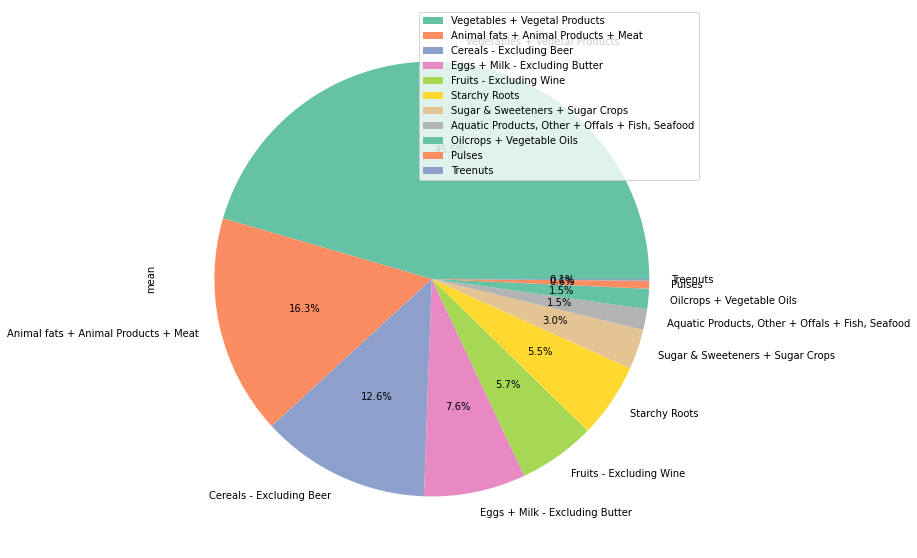

In [43]:
food_mean = intake.describe().iloc[1]
food_mean = pd.DataFrame(food_mean).drop(['Obesity', 'Undernourished', 'Confirmed', 'Deaths', 'Confirmed (%)', 'Deaths (%)', 'Population'], axis=0)
food_mean = food_mean.sort_values(by='mean', ascending=False)
food_mean_plot = food_mean.plot.pie(subplots=True, figsize=(14, 10),autopct='%1.1f%%')

As the figure shown belown, <b>Vegetables + Vegetal Products</b> (45.5%), which are categorized as healthy food are the most consumed by people worldwidely, followed by <b>Animal fats + Animal Products + Meat</b> (16.3%) and <b>Cereals - Excluding Beer</b> (12.6%).

## 1.2  Malnutrition Rate

Malnutrition occurs when the body doesn't get enough or balanced nutrients(WHO, 2020).  
It covers 2 broad groups of conditions: undernutrition and obesity. The world average malnutrition rate is:  
- Obesity: 18%  
- Undernourished: 11%  
  
(as shown in intake.describe() - mean row)

## 1.3 COVID-19 Case Rate

In [44]:
fig = px.bar(intake, x = "Country", y ="Confirmed").update_xaxes(categoryorder="total descending")
fig.show()

In [45]:
fig = px.bar(intake, x = "Country", y ="Deaths").update_xaxes(categoryorder="total descending")
fig.show()

<b>The United States of America</b> has the most confirmed and deaths cases. 

To better describe COVID-19 cases rate, we combine the diagnosed cases and the death using concept of <b>Case fatality rate (CFR)</b>:  
- CRF = Number of Deaths / Number of Confirmed Cases (Ritchie et al., 2020)  

We calculate the CRF of all countries, which are presented below. In the following analysis, we also use CRF besides COVID-19 case rate.

In [46]:
intake['CRF'] = intake['Deaths']/intake['Confirmed']
intake['CRF']

0      0.046553
1      0.015772
2      0.028678
3      0.026532
4      0.021924
         ...   
148    0.012022
149    0.024061
150    0.192249
151    0.017456
152    0.035170
Name: CRF, Length: 153, dtype: float64

In [47]:
fig = px.bar(intake, x = "Country", y ="CRF").update_xaxes(categoryorder="total descending")
fig.show()

I consider the CRF of <b>Yemen</b> (19.22%) as an <b>outlier</b> and remove it in the following association analysis.

# 2 Association Detection

## 2.1 Food consumption & COVID-19 cases

(array([0.5]), [Text(0.5, 0, 'Deaths')])

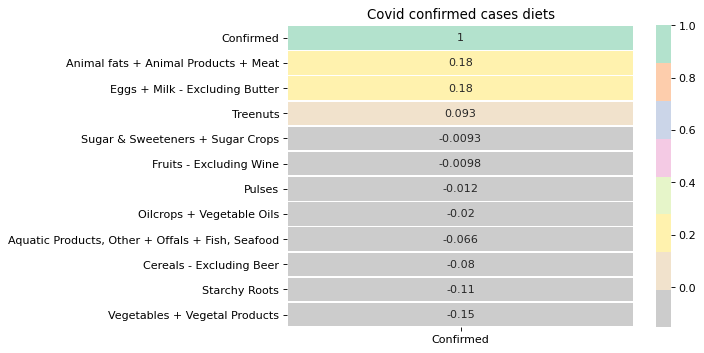

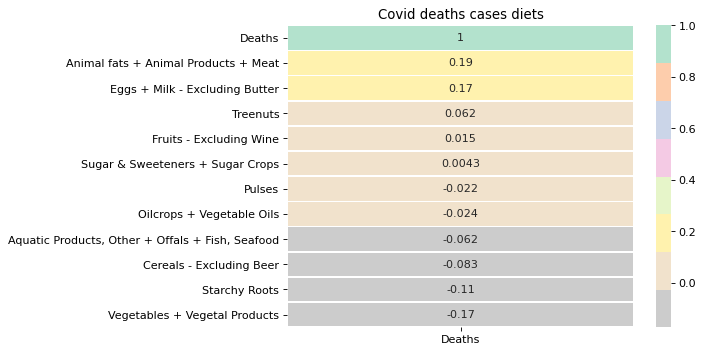

In [48]:
corr_fig = intake[['Confirmed','Animal fats + Animal Products + Meat', 'Aquatic Products, Other + Offals + Fish, Seafood', 'Cereals - Excluding Beer', 'Eggs + Milk - Excluding Butter', 'Fruits - Excluding Wine', 'Oilcrops + Vegetable Oils', 'Pulses', 'Starchy Roots', 'Sugar & Sweeteners + Sugar Crops', 'Treenuts', 'Vegetables + Vegetal Products']]
x = corr_fig.corr(method='pearson')
plt.figure(figsize=(7,5), dpi= 80)
sns.heatmap(x[['Confirmed']].sort_values(by=['Confirmed'],ascending=False),cmap='Pastel2_r',annot=True,linewidth=0.6)
plt.title('Covid confirmed cases diets')
plt.xticks()

corr_fig = intake[['Deaths','Animal fats + Animal Products + Meat', 'Aquatic Products, Other + Offals + Fish, Seafood', 'Cereals - Excluding Beer', 'Eggs + Milk - Excluding Butter', 'Fruits - Excluding Wine', 'Oilcrops + Vegetable Oils', 'Pulses', 'Starchy Roots', 'Sugar & Sweeteners + Sugar Crops', 'Treenuts', 'Vegetables + Vegetal Products']]
x = corr_fig.corr(method='pearson')
plt.figure(figsize=(7,5), dpi= 80)
sns.heatmap(x[['Deaths']].sort_values(by=['Deaths'],ascending=False),cmap='Pastel2_r',annot=True,linewidth=0.6)
plt.title('Covid deaths cases diets')
plt.xticks()

Generally, the relationship between food consumption and countries' confirmed cases and food consumption and deaths cases are very similar.  
The top 1 correlations is <b>Animal fats + Animal Products + Meat</b>.

## 2.2 Food consumption & Malnutrition

In [49]:
intake[intake.Obesity < intake['Obesity'].mean()].shape

(62, 20)

In [50]:
intake[intake.Obesity > intake['Obesity'].mean()].shape

(91, 20)

Take the average obesity rate as a boundary, we divide the world into <b>HOC</b> (High Obesity Countries) and <b>LOC</b> (Low Obesity Countries). 

In [51]:
high_obesity = intake[intake.Obesity > intake['Obesity'].mean()]
low_obesity = intake[intake.Obesity <= intake['Obesity'].mean()]
intake['ObesityAboveAverage'] = (intake["Obesity"] > intake['Obesity'].mean()).astype(int)
intake['ObesityAboveAverage']

0      0
1      1
2      1
3      0
4      1
      ..
148    1
149    0
150    0
151    0
152    0
Name: ObesityAboveAverage, Length: 153, dtype: int32

We start by exploring the most decisive food types: <b>Animal fats + Animal Products + Meat</b>. Research shows they may cause obesity.

In [52]:
fig = px.histogram(intake, x = "Animal fats + Animal Products + Meat", nbins=50, color = "ObesityAboveAverage", marginal="rug")

fig.add_shape(
            type = "line",
            x0 = high_obesity['Animal fats + Animal Products + Meat'].median(),
            y0 = 0,
            x1 = high_obesity['Animal fats + Animal Products + Meat'].median(),
            y1 = 12,
            line = dict(color="crimson", width=4),
    )

fig.add_shape(
            type = "line",
            x0 = low_obesity['Animal fats + Animal Products + Meat'].median(),
            y0 = 0,
            x1 = low_obesity['Animal fats + Animal Products + Meat'].median(),
            y1 = 12,
            line = dict(color="darkblue", width=4),
    )

fig.show()

In [53]:
fig = px.histogram(intake, x = "Vegetables + Vegetal Products", nbins=50, color = "ObesityAboveAverage", marginal="rug")

fig.add_shape(
            type = "line",
            x0 = high_obesity['Vegetables + Vegetal Products'].median(),
            y0 = 0,
            x1 = high_obesity['Vegetables + Vegetal Products'].median(),
            y1 = 12,
            line = dict(color="crimson", width=4),
    )

fig.add_shape(
            type = "line",
            x0 = low_obesity['Vegetables + Vegetal Products'].median(),
            y0 = 0,
            x1 = low_obesity['Vegetables + Vegetal Products'].median(),
            y1 = 12,
            line = dict(color="darkblue", width=4),
    )

fig.show()

HOC have a higher consumption of <b>Animal fats + Animal Products + Meat</b> (belongs to unhealthy diet) and lower consumption of <b>Vegetables + Vegetal Products</b> (belongs to healthy diet).

## 2.3 Obesity & COVID-19

(array([0.5, 1.5, 2.5, 3.5]),
 [Text(0.5, 0, 'Confirmed (%)'),
  Text(1.5, 0, 'Deaths (%)'),
  Text(2.5, 0, 'Undernourished'),
  Text(3.5, 0, 'Obesity')])

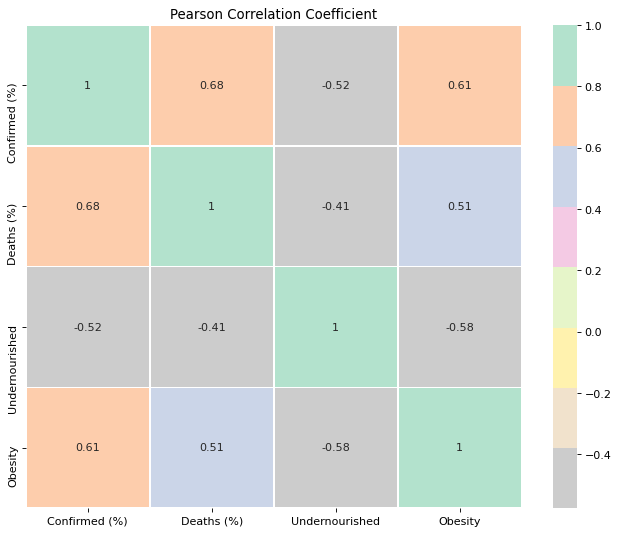

In [54]:
corr_map = intake[['Confirmed (%)', 'Deaths (%)', 'Undernourished', 'Obesity']]
x = corr_map.corr(method='pearson')
plt.figure(figsize=(10,8), dpi= 80)
sns.heatmap(x,cmap='Pastel2_r',annot=True,linewidth=0.6)
plt.title('Pearson Correlation Coefficient')
plt.xticks()

<b>obesity</b> has a stronger correlation (positive) with COVID-19 Confirmed/ Deaths than undernourished

In [55]:
fig = px.bar(intake, x = "Country", y ="Deaths", facet_col = "ObesityAboveAverage")
fig.update_xaxes(matches=None,categoryorder="total descending")
fig.show()

HOC have more COVID-19 deaths cases

In [56]:
fig = px.scatter(intake[intake.Country != 'Yemen'], x="Deaths", y = "Obesity", size = "CRF",
                 hover_name='Country', log_x=False, size_max=30, template="simple_white")

fig.add_shape(
            type = "line",
            x0 = 0,
            y0 = intake[intake.Country != 'Yemen']['Obesity'].mean(),
            x1 = intake[intake.Country != 'Yemen']['Deaths'].max(),
            y1 = intake[intake.Country != 'Yemen']['Obesity'].mean(),
            line = dict(color="crimson", width=4),
    )

fig.show()

HOC have higher CRF.  
The red line represents the average obesity rate among countries. The size of the points corresponds to the country's COVID-19 CRF.